<a href="https://colab.research.google.com/github/Tommy840602/KNeighbors/blob/main/KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score,explained_variance_score

In [3]:
#Data PreProcessing
pd.options.display.float_format = '{:.4f}'.format

scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv('/content/Hydropower_Consumption.csv', sep=',')
df = df.drop(columns = ["Country"])
df = pd.DataFrame(scaler.fit_transform(df),
          columns=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011',
               '2012','2013','2014','2015','2016','2017','2018','2019'])
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000
mean,0.0327,0.0353,0.0355,0.0328,0.0419,0.0390,0.0415,0.0434,0.0371,0.0445,0.0328,0.0433,0.0352,0.0290,0.0282,0.0265,0.0306,0.0296,0.0388,0.0259
std,0.1229,0.1262,0.1278,0.1249,0.1372,0.1364,0.1366,0.1440,0.1293,0.1493,0.1208,0.1459,0.1294,0.1121,0.1062,0.1031,0.1117,0.1110,0.1317,0.1043
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0002,0.0003,0.0003,0.0003,0.0003,0.0004,0.0003,0.0004,0.0004,0.0003,0.0004,0.0002,0.0004,0.0002,0.0003,0.0002,0.0002,0.0002,0.0003,0.0002
50%,0.0027,0.0030,0.0026,0.0027,0.0037,0.0028,0.0031,0.0039,0.0032,0.0035,0.0043,0.0040,0.0034,0.0025,0.0024,0.0019,0.0025,0.0020,0.0029,0.0019
75%,0.0116,0.0128,0.0119,0.0118,0.0155,0.0107,0.0149,0.0151,0.0147,0.0152,0.0145,0.0156,0.0140,0.0096,0.0121,0.0086,0.0117,0.0113,0.0171,0.0097
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [4]:
X = df.drop(columns = ["2019"])
y = df["2019"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
#Testing k Factors
rmsle_val = []
best_rmsle = 1.0

for k in range(20):
    k = k+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmsle = np.sqrt(mean_squared_log_error(y_test,y_pred))
    if (rmsle < best_rmsle):
        best_rmsle = rmsle
        best_k = k
    rmsle_val.append(rmsle)
    print('RMSLE value for k= ' , k , 'is:', rmsle)

print(f"Best RMSLE: {best_rmsle}, Best k: {best_k}")

RMSLE value for k=  1 is: 0.05771085849033799
RMSLE value for k=  2 is: 0.046287824938614094
RMSLE value for k=  3 is: 0.05245290672301628
RMSLE value for k=  4 is: 0.0390437087453098
RMSLE value for k=  5 is: 0.04413545109970342
RMSLE value for k=  6 is: 0.049397885066996064
RMSLE value for k=  7 is: 0.05368842644105437
RMSLE value for k=  8 is: 0.057205532019402504
RMSLE value for k=  9 is: 0.05970971610365409
RMSLE value for k=  10 is: 0.06264220706736036
RMSLE value for k=  11 is: 0.06519555508343818
RMSLE value for k=  12 is: 0.06683376633168203
RMSLE value for k=  13 is: 0.06835697276199447
RMSLE value for k=  14 is: 0.0700987590270357
RMSLE value for k=  15 is: 0.0714815908074978
RMSLE value for k=  16 is: 0.07276108145829546
RMSLE value for k=  17 is: 0.07381745094856672
RMSLE value for k=  18 is: 0.07488933459172763
RMSLE value for k=  19 is: 0.07579673979403485
RMSLE value for k=  20 is: 0.07667076282857414
Best RMSLE: 0.0390437087453098, Best k: 4


<Axes: >

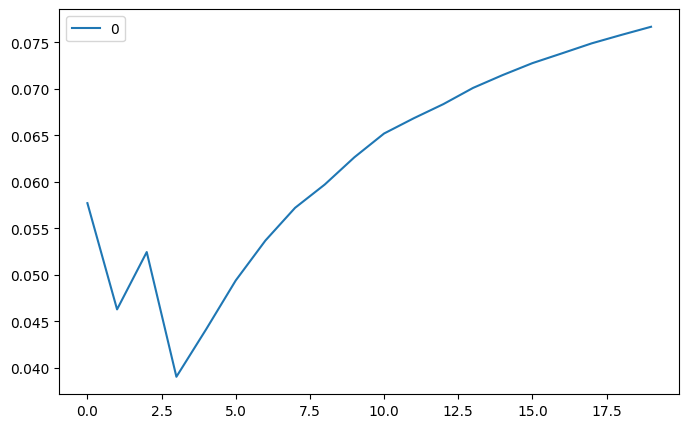

In [7]:
curve = pd.DataFrame(rmsle_val)
curve.plot(figsize=(8,5))

In [8]:
#Tuning Hyperparameters
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 4}

In [10]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 4)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("knn score:",knn.score(X_test, y_test))

knn score: 0.8016285342188538


In [12]:
#Validating the Models with Metrics

r2_valid = r2_score(y_test, y_pred)
mae_valid = mean_absolute_error(y_test, y_pred)
evs_valid = explained_variance_score(y_test, y_pred, multioutput='uniform_average')
rmse_valid = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle_valid = np.sqrt(mean_squared_log_error(y_test, y_pred))

print('R^2 score:',r2_valid)
print('Explained Variance Score:', evs_valid)
print('MAE:', mae_valid)
print('RMSE:',rmse_valid)
print('RMSLE:', rmsle_valid)

R^2 score: 0.8016285342188538
Explained Variance Score: 0.8131526313306373
MAE: 0.017960057840249434
RMSE: 0.04999229884993785
RMSLE: 0.0390437087453098


In [13]:
#Predicting Energy Generation
data_prediction = list(zip(y_test,y_pred))
data_prediction = pd.DataFrame(data_prediction, columns=['Test','Prediction'])
data_prediction.head(10)

,Test,Prediction
0,0.0406,0.0268
1,0.0044,0.0039
2,0.0134,0.0096
3,0.0280,0.0128
4,0.0164,0.0125
5,0.0321,0.0155
6,0.4982,0.3417
7,0.5331,0.3417
8,0.0007,0.0075
9,0.0032,0.0039
